# **D209 PA Task 1 - Classification Methods | File 1**

In [217]:
import pandas as pd #dataframes
import numpy as np #arrays
import seaborn as sns #visualization
import matplotlib as plt #visualization

In [218]:
from sklearn.impute import SimpleImputer #impute missing values
from sklearn.feature_selection import SelectKBest, f_classif #Feature selection

In [219]:
df= pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [220]:
#drop columns: customer IDs and demographics
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone'], inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,38,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [221]:
#drop other columns

df.drop(columns=['Email', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,0,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,0,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,0,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,Solicitor,1,48,18925.23,Married,Male,No,14.913540,2,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,2,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


# EDA

In [222]:
df.shape

(10000, 29)

In [223]:
df.dtypes

Population                int64
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [224]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530


In [225]:
df.describe(include=object)

,Job,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,7871,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,639,5,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,4
top,Occupational psychologist,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,30,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


In [226]:
# drop "Job" variable - too many unique observations to encode with dummy variables
df.drop(columns='Job', inplace=True)
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


In [227]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [228]:
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [229]:
df.duplicated().value_counts() #check for duplicated rows

False    10000
Name: count, dtype: int64

In [230]:
df.isnull().sum() #missing values

Population                 0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure                     0
MonthlyCharge              0
Bandwidth_GB_Year          0
dtype: int64

In [231]:
df['InternetService'].value_counts() #2129 missing values from "InternetService" -- will take care of this when getting dummy variables

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [232]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

# OUTLIERS

- see D208 file for outlier exploration

In [233]:
df.drop(df[df['Income'] > 200000].index, inplace=True)

df.drop(df[df['Population'] > 100000].index, inplace=True)

# Encoding Categorical Data

### Dummy Variables 'InternetService'

In [234]:
#get dummy variables on "InternetService"
df = pd.get_dummies(df, columns=['InternetService'])
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,True
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,True,False
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,True,False
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,True


In [235]:
#remove the space in column title
df.rename(columns={'InternetService_Fiber Optic' : 'InternetService_FiberOptic'}, inplace=True)
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,True
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,True,False
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,True,False
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,True


In [236]:
df[['InternetService_FiberOptic', 'InternetService_DSL']].dtypes

InternetService_FiberOptic    bool
InternetService_DSL           bool
dtype: object

In [237]:
df['InternetService_DSL'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [238]:
df['InternetService_FiberOptic'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [239]:
df[['InternetService_DSL', 'InternetService_FiberOptic']]

,InternetService_DSL,InternetService_FiberOptic
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
9995,1,0
9996,0,1
9997,0,1
9998,0,1


In [240]:
df[['InternetService_DSL', 'InternetService_FiberOptic']].dtypes

InternetService_DSL           int64
InternetService_FiberOptic    int64
dtype: object

### Dummy Variables 'Marital'

In [241]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [242]:
df = pd.get_dummies(df, columns=['Marital'])
df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,6.795513,172.455519,904.536110,0,1,False,False,False,False,True
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,1.156681,242.632554,800.982766,0,1,False,True,False,False,False
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,15.754144,159.947583,2054.706961,1,0,False,False,False,False,True
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,17.087227,119.956840,2164.579412,1,0,False,True,False,False,False
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,1.670972,149.948316,271.493436,0,1,False,False,False,True,False


In [243]:
#remove the space in column title
df.rename(columns={'Marital_Never Married' : 'Marital_NeverMarried'}, inplace=True)
df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_NeverMarried,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,6.795513,172.455519,904.536110,0,1,False,False,False,False,True
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,1.156681,242.632554,800.982766,0,1,False,True,False,False,False
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,15.754144,159.947583,2054.706961,1,0,False,False,False,False,True
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,17.087227,119.956840,2164.579412,1,0,False,True,False,False,False
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,1.670972,149.948316,271.493436,0,1,False,False,False,True,False


In [244]:
#drop "Never Married" variable -- info is inherently encoded in the other martial options

df.drop(columns=['Marital_NeverMarried'], inplace=True)
df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,Credit Card (automatic),6.795513,172.455519,904.536110,0,1,False,False,False,True
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,Bank Transfer(automatic),1.156681,242.632554,800.982766,0,1,False,True,False,False
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,Credit Card (automatic),15.754144,159.947583,2054.706961,1,0,False,False,False,True
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,Mailed Check,17.087227,119.956840,2164.579412,1,0,False,True,False,False
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,Mailed Check,1.670972,149.948316,271.493436,0,1,False,False,True,False


In [245]:
df['Marital_Divorced'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,Credit Card (automatic),6.795513,172.455519,904.536110,0,1,0,False,False,True
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,Bank Transfer(automatic),1.156681,242.632554,800.982766,0,1,0,True,False,False
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,Credit Card (automatic),15.754144,159.947583,2054.706961,1,0,0,False,False,True
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,Mailed Check,17.087227,119.956840,2164.579412,1,0,0,True,False,False
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,Mailed Check,1.670972,149.948316,271.493436,0,1,0,False,True,False


In [246]:
df['Marital_Married'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Marital_Separated'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Marital_Widowed'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,Credit Card (automatic),6.795513,172.455519,904.536110,0,1,0,0,0,1
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,Bank Transfer(automatic),1.156681,242.632554,800.982766,0,1,0,1,0,0
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,Credit Card (automatic),15.754144,159.947583,2054.706961,1,0,0,0,0,1
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,Mailed Check,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,Mailed Check,1.670972,149.948316,271.493436,0,1,0,0,1,0


In [247]:
df[['Marital_Divorced', 'Marital_Married', 'Marital_Separated', 'Marital_Widowed']].dtypes

Marital_Divorced     int64
Marital_Married      int64
Marital_Separated    int64
Marital_Widowed      int64
dtype: object

### Dummy Variables 'Gender'

In [248]:
df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [249]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,904.536110,0,1,0,0,0,1,False,True,False
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,800.982766,0,1,0,1,0,0,True,False,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,2054.706961,1,0,0,0,0,1,True,False,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,2164.579412,1,0,0,1,0,0,False,True,False
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,271.493436,0,1,0,0,1,0,False,True,False


In [250]:
#drop "Nonbinary" variable -- info is inherently encoded

df.drop(columns=['Gender_Nonbinary'], inplace=True)
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,172.455519,904.536110,0,1,0,0,0,1,False,True
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,242.632554,800.982766,0,1,0,1,0,0,True,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,159.947583,2054.706961,1,0,0,0,0,1,True,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,119.956840,2164.579412,1,0,0,1,0,0,False,True
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,149.948316,271.493436,0,1,0,0,1,0,False,True


In [251]:
df['Gender_Female'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Gender_Male'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,172.455519,904.536110,0,1,0,0,0,1,0,1
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,242.632554,800.982766,0,1,0,1,0,0,1,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,159.947583,2054.706961,1,0,0,0,0,1,1,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,119.956840,2164.579412,1,0,0,1,0,0,0,1
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,149.948316,271.493436,0,1,0,0,1,0,0,1


In [252]:
df[['Gender_Female', 'Gender_Male']].dtypes

Gender_Female    int64
Gender_Male      int64
dtype: object

### Dummy Variables "Contract"

In [253]:
df['Contract'].value_counts()

Contract
Month-to-month    5453
Two Year          2438
One year          2101
Name: count, dtype: int64

In [254]:
df = pd.get_dummies(df, columns=['Contract'])
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,1,0,0,0,1,0,1,False,True,False
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,1,0,1,0,0,1,0,True,False,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,0,0,0,1,1,0,False,False,True
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,0,0,1,0,0,0,1,False,False,True
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,1,0,0,1,0,0,1,True,False,False


In [255]:
#drop "Two Year" variable -- info is inherently encoded

df.drop(columns=['Contract_Two Year'], inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,1,0,0,0,1,0,1,False,True
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,0,1,0,1,0,0,1,0,True,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,1,0,0,0,0,1,1,0,False,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,1,0,0,0,1,False,False
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,0,0,1,True,False


In [256]:
#remove space in column title
df.rename(columns={'Contract_One year' : 'Contract_OneYear'}, inplace=True)
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,1,0,0,0,1,0,1,False,True
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,0,1,0,1,0,0,1,0,True,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,1,0,0,0,0,1,1,0,False,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,1,0,0,0,1,False,False
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,0,0,1,True,False


In [257]:
df['Contract_Month-to-month'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Contract_OneYear'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,1,0,0,0,1,0,1,0,1
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,0,1,0,1,0,0,1,0,1,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,1,0,0,0,0,1,1,0,0,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,1,0,0,0,1,0,0
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,0,0,1,1,0


### Dummy Variables Payment Method

In [258]:
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [259]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3395
Mailed Check                2290
Bank Transfer(automatic)    2226
Credit Card (automatic)     2081
Name: count, dtype: int64

In [260]:
df = pd.get_dummies(df, columns=['PaymentMethod'])
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,1,0,1,0,1,False,True,False,False
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,0,0,1,0,1,0,True,False,False,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,1,1,0,0,0,False,True,False,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,0,0,0,1,0,0,False,False,False,True
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,1,0,0,1,1,0,False,False,False,True


In [261]:
#drop "Mailed Check" variable -- info is inherently encoded

df.drop(columns=['PaymentMethod_Mailed Check'], inplace=True)
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,0,1,0,1,0,1,False,True,False
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,1,0,0,1,0,1,0,True,False,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,0,1,1,0,0,0,False,True,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,0,1,0,0,False,False,False
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,1,0,False,False,False


In [262]:
#remove space in column title
df.rename(columns={'PaymentMethod_Bank Transfer(automatic)' : 'PaymentMethod_BankTransfer(automatic)'}, inplace=True)

df.rename(columns={'PaymentMethod_Credit Card (automatic)' : 'PaymentMethod_CreditCard(automatic)'}, inplace=True)

df.rename(columns={'PaymentMethod_Electronic Check' : 'PaymentMethod_ElectronicCheck'}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,0,1,0,1,0,1,False,True,False
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,1,0,0,1,0,1,0,True,False,False
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,0,1,1,0,0,0,False,True,False
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,0,1,0,0,False,False,False
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,1,0,False,False,False


In [263]:
df['PaymentMethod_BankTransfer(automatic)'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['PaymentMethod_CreditCard(automatic)'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['PaymentMethod_ElectronicCheck'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,0,1,0,1,0,1,0,1,0
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,1,0,0,1,0,1,0,1,0,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,0,1,1,0,0,0,0,1,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,0,1,0,0,0,0,0
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,1,0,0,0,0


## Ordinal Encoding

In [264]:
df.dtypes

Population                                 int64
Children                                   int64
Age                                        int64
Income                                   float64
Churn                                     object
Outage_sec_perweek                       float64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                    object
Port_modem                                object
Tablet                                    object
Phone                                     object
Multiple                                  object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
Tenure              

In [265]:
df['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Techie'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Port_modem'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Tablet'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Phone'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Multiple'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineSecurity'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineBackup'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['DeviceProtection'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['TechSupport'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingTV'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingMovies'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['PaperlessBilling'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck
0,38,0,68,28561.99,0,7.978323,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
1,10446,1,27,21704.77,1,11.699080,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3735,4,50,9609.57,0,10.752800,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
3,13863,1,48,18925.23,0,14.913540,2,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,11352,0,83,40074.19,1,8.147417,2,1,0,1,...,0,1,0,0,1,1,0,0,0,0


In [266]:
df.dtypes

Population                                 int64
Children                                   int64
Age                                        int64
Income                                   float64
Churn                                      int64
Outage_sec_perweek                       float64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                     int64
Port_modem                                 int64
Tablet                                     int64
Phone                                      int64
Multiple                                   int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
Tenure              

# FEATURE SELECTION
- research question: what features are predicting churn?

In [267]:
# Assign values to X for all predictor features
# Assign values to y for the dependent variable

X = df.drop(["Churn"], axis=1)
y = df['Churn']
print(X.shape)
print(y.shape)


(9992, 35)
(9992,)


In [268]:
feature_names = X.columns

# Initialize the class and call fit_transform

# from sklearn.feature_selection import SelectKBest (already imported)

skbest = SelectKBest(score_func = f_classif, k='all')  
X_new = skbest.fit_transform(X, y)
X_new.shape	


(9992, 35)

In [269]:
### Finding P-values to select statistically significant features 

p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# Print the name of the selected features

features_to_keep


21                Bandwidth_GB_Year
20                    MonthlyCharge
19                           Tenure
17                  StreamingMovies
30          Contract_Month-to-month
16                      StreamingTV
31                 Contract_OneYear
11                         Multiple
22              InternetService_DSL
7                            Techie
23       InternetService_FiberOptic
14                 DeviceProtection
13                     OnlineBackup
34    PaymentMethod_ElectronicCheck
29                      Gender_Male
28                    Gender_Female
10                            Phone
Name: Feature, dtype: object

## The initial data set varaibles ^^

In [270]:
df_2 = df[features_to_keep]
df_2.head()

,Bandwidth_GB_Year,MonthlyCharge,Tenure,StreamingMovies,Contract_Month-to-month,StreamingTV,Contract_OneYear,Multiple,InternetService_DSL,Techie,InternetService_FiberOptic,DeviceProtection,OnlineBackup,PaymentMethod_ElectronicCheck,Gender_Male,Gender_Female,Phone
0,904.536110,172.455519,6.795513,1,0,0,1,0,0,0,1,0,1,0,1,0,1
1,800.982766,242.632554,1.156681,1,1,1,0,1,0,1,1,0,0,0,0,1,1
2,2054.706961,159.947583,15.754144,1,0,0,0,1,1,1,0,0,0,0,0,1,1
3,2164.579412,119.956840,17.087227,0,0,1,0,0,1,1,0,0,0,0,1,0,1
4,271.493436,149.948316,1.670972,0,1,1,0,0,0,0,1,0,0,0,1,0,0


# MULTICOLLINEARITY

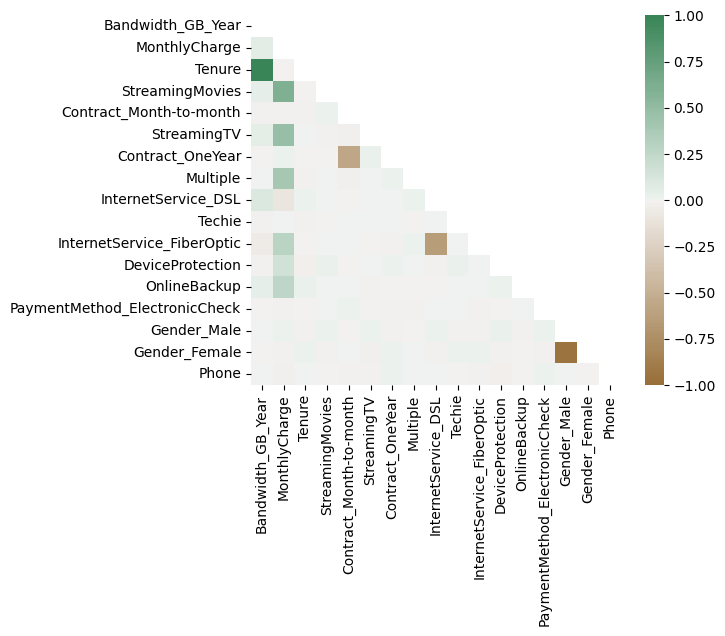

In [271]:
df_corr = df_2.corr()


mask = np.triu(np.ones_like(df_2.corr(), dtype=bool))


axis_corr = sns.heatmap(
    df_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    mask=mask, 
    square=True
)


In [272]:
#use Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [273]:
def compute_vif(considered_features):
    X = df_2[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif


In [274]:
considered_features = ['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure', 'StreamingMovies', 'Contract_Month-to-month', 'StreamingTV', 'Contract_OneYear', 
                       'Multiple', 'InternetService_DSL', 'Techie', 'InternetService_FiberOptic', 'DeviceProtection', 'OnlineBackup',
                       'PaymentMethod_ElectronicCheck', 'Gender_Male', 'Gender_Female', 'Phone']

compute_vif(considered_features).sort_values('VIF', ascending = False)

,Variable,VIF
0,Bandwidth_GB_Year,447.846547
2,Tenure,440.624237
1,MonthlyCharge,16.895882
14,Gender_Male,11.523883
15,Gender_Female,11.380355
3,StreamingMovies,7.043531
5,StreamingTV,5.209589
8,InternetService_DSL,5.182524
10,InternetService_FiberOptic,4.107816
7,Multiple,3.263333


<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

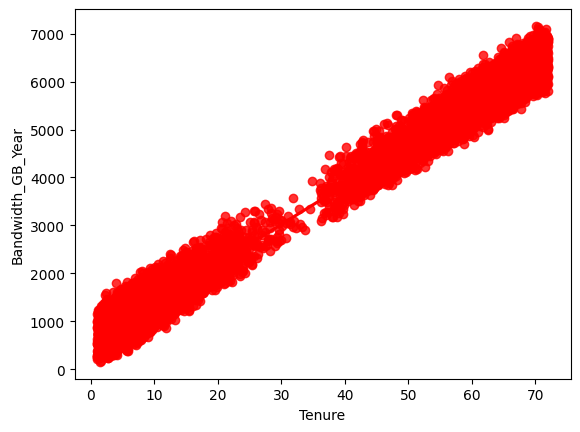

In [275]:
sns.regplot(x='Tenure', y='Bandwidth_GB_Year', data=df_2, color='red', ci=None)

Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness of fit. So if our primary goal is just to make predictions we don’t need to reduce multicollinearity.

Majorly multicollinearity affects Linear models like-Linear Regression, Logistics Regression. Not much impact on the Algorithms like KNN, Decision Tree, etc which are non-linea

https://medium.com/mlearning-ai/multicollinearity-6b00447a677ar.

# SCALING, SPLITTING DATA, & FITTING KNN MODEL 

In [276]:
from sklearn.preprocessing import scale      #scale data values
from sklearn.preprocessing import StandardScaler     #scale data values

from sklearn.model_selection import train_test_split     #split data into training set and testing set
from sklearn.neighbors import KNeighborsClassifier    #KNN classifier

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV    #GridSearchCV tind optimal k

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [277]:
# Defining X = features, y=target

X = df_2      #df_2 does not contain Churn data
y = df["Churn"]   #df contains churn data
print(X.shape)
print(y.shape)

(9992, 17)
(9992,)


In [278]:
from sklearn.pipeline import Pipeline

In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer

In [320]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15, stratify=y)

In [319]:
#select numeric and categorical data types. only scale numeric types

numeric_columns = list(X.select_dtypes('float64').columns)
categorical_columns = list(X.select_dtypes('int64').columns)

In [334]:
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns)], 
    remainder='passthrough')               #keep non-numeric columns unchanged

# pipeline with preprocessor and Knn classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# define hyperparameters for GridSearchCV
parameters = {'knn__n_neighbors': np.arange(1, 25)}

# GridSearchCV object
knncv = GridSearchCV(estimator=pipeline, 
                     param_grid=parameters, 
                     n_jobs=-1,
                     cv=5, 
                     scoring='accuracy')

# Fit the model
knncv.fit(X_train, y_train)

#Print best params and best score
print("Best Parameters: ", knncv.best_params_)
print("Best CV Score: ", knncv.best_score_)


# Predict on test set
y_pred = knncv.predict(X_test)
print("Accuracy score for test set: ", accuracy_score(y_test, y_pred))

# Evaluate the model on test set
test_accuracy = knncv.score(X_test, y_test)
print("Test Set Accuracy: ", test_accuracy)


Best Parameters:  {'knn__n_neighbors': 16}
Best CV Score:  0.8860264667920579
Accuracy score for test set:  0.8769384692346173
Test Set Accuracy:  0.8769384692346173


In [337]:
# accuracy on Train
print('Training Accuracy: ', knncv.best_score_)

# accuracy on Test
print('Testing Accuracy: ', knncv.score(X_test, y_test))

Training Accuracy:  0.8860264667920579
Testing Accuracy:  0.8769384692346173


In [338]:
#AUC (area under the curve)

print("AUC")
y_pred_probability = knncv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_probability)

AUC


0.9316811590479983

In [339]:
#confusion matrix

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[1381   88]
 [ 158  372]]


In [340]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1469
           1       0.81      0.70      0.75       530

    accuracy                           0.88      1999
   macro avg       0.85      0.82      0.83      1999
weighted avg       0.87      0.88      0.87      1999



# EXPORT CLEANED DATA SET & TRAIN & TEST DATA SETS

In [201]:
# prepared data set, only variables from feature selection and target variable included

# concatenate feature variables and target variable (Churn)
prepared_df = pd.concat([df_2, df['Churn']], axis=1)
prepared_df
  

,Bandwidth_GB_Year,MonthlyCharge,Tenure,StreamingMovies,Contract_Month-to-month,StreamingTV,Contract_OneYear,Multiple,InternetService_DSL,Techie,InternetService_FiberOptic,DeviceProtection,OnlineBackup,PaymentMethod_ElectronicCheck,Gender_Male,Gender_Female,Phone,Churn
0,904.536110,172.455519,6.795513,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1,800.982766,242.632554,1.156681,1,1,1,0,1,0,1,1,0,0,0,0,1,1,1
2,2054.706961,159.947583,15.754144,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0
3,2164.579412,119.956840,17.087227,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
4,271.493436,149.948316,1.670972,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6511.252601,159.979400,68.197130,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0
9996,5695.951810,207.481100,61.040370,0,0,1,0,1,0,0,1,1,1,1,1,0,1,0
9997,4159.305799,169.974100,47.416890,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0
9998,6468.456752,252.624000,71.095600,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0


In [202]:
prepared_df.to_csv('prepared_clean_data_knn_classification.csv', index=False)

In [203]:
# export training and testing datasets
# concatenate training x and y and testing x and y

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('training_dataset_knn_classification.csv', index=False)
test_df.to_csv('testing_dataset_knn_classification.csv', index=False)

In [307]:
filt = train_df[["Contract_Month-to-month", 'Churn']]
filt.groupby('Churn').value_counts()

Churn  Contract_Month-to-month
0      0                          3150
       1                          2723
1      1                          1627
       0                           493
Name: count, dtype: int64

In [308]:
filt = train_df[["Contract_Month-to-month", 'Churn']]
filt.groupby('Contract_Month-to-month').value_counts()

Contract_Month-to-month  Churn
0                        0        3150
                         1         493
1                        0        2723
                         1        1627
Name: count, dtype: int64